# Preparation

## Library installation/import

Install and import libraries that are used in multiple sections of the pipeline.

In [2]:
'''!pip install --upgrade numpy
!pip install gensim'''

'!pip install --upgrade numpy\n!pip install gensim'

In [3]:
import pandas as pd

In [4]:
'''!pip install spacy
!pip install tweepy
!pip install wordcloud'''

'!pip install spacy\n!pip install tweepy\n!pip install wordcloud'

## Configuring Twitter API keys

<font color="red">**IMPORTANT NOTE:** Please note that the API keys below are the course leader's own API keys. You are allowed to use it to do some small tests, but please be careful because all students in the class now have a copy of it, and hence the limits can be easily exceeded.</font>

If your group has decided to use Twitter data, you can [apply for your own keys](https://developer.twitter.com/en/apply-for-access).

In [5]:
import tweepy

auth = tweepy.OAuthHandler('BcWEliOxF0h6v9VWpUlNtS5nU', 'HfW6WHnnPqB5BkodYKgMTAihGbmEjioJpP3DhAekLLtVeb6xIi')
auth.set_access_token('841021709209731073-rRR8mlOkIw7pLGEnplp03nWwnYOGwJ3', 'Aa2c8dlmUOKzsRRRc0v6gELtKbJFAkcNwNzOe9T6uuCUQ')

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

## Downloading of new data set

<font color="red">**IMPORTANT NOTE:** Please do not run the cell below unless intending to download a new data set. If you just want to see what the rest of the code in this notebook produces, you can skip this cell and proceed to the next one (under Data pre-processing/Cleaning), which will read data from the `current_set.csv` file that has been provided to you.</font>

Should you decide to run this cell, you can explore by changing the parameters.

Also, check the [Tweepy API reference](https://docs.tweepy.org/en/latest/api.html) to find out about other ways through which you can retrieve tweets, e.g., by specifying usernames.

**WARNING:** It is likely that the retrieved tweets, which will be displayed in succeeding cells, contain strong language that some might find offensive or disturbing.

In [6]:
'''# Collect tweets
query = "#britawards" + " -filter:retweets"
cutoff_date = "2023-02-01"
tweets = tweepy.Cursor(api.search, q=query, lang="en", since=cutoff_date).items(300)

tweets_list = [[tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]

tweets_df = pd.DataFrame(data=tweets_list, columns=['date', 'user', 'location', 'text'])

# A good idea to save downloaded tweets as CSV
tweets_df.to_csv ('current_set.csv', quotechar='"', encoding='utf8', index = False, header=True)'''

'# Collect tweets\nquery = "#britawards" + " -filter:retweets"\ncutoff_date = "2023-02-01"\ntweets = tweepy.Cursor(api.search, q=query, lang="en", since=cutoff_date).items(300)\n\ntweets_list = [[tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]\n\ntweets_df = pd.DataFrame(data=tweets_list, columns=[\'date\', \'user\', \'location\', \'text\'])\n\n# A good idea to save downloaded tweets as CSV\ntweets_df.to_csv (\'current_set.csv\', quotechar=\'"\', encoding=\'utf8\', index = False, header=True)'

# Data pre-processing

## [Outdated] Cleaning (Original sample code)

Below we provide some code for text cleaning. However, we encourage you to think of other ways to clean your data, e.g., by removing hashtags, removing usernames, removing duplicate tweets?

In [70]:
'''# Load the regular expression library
import re

# Make sure that line below is uncommented, if you are loading data from a provided/previously saved CSV
# tweets_df = pd.read_csv('evgeni_dataset06032023.csv', quotechar='"', encoding='utf8')
tweets_df = pd.read_csv('ram_dataset_mufc.csv', quotechar='"', encoding='utf8')


# Remove punctuation
tweets_df['text_processed'] = tweets_df['text'].map(lambda x: re.sub('[,\\.!?]', ' ', x))

# Remove unnecessary line breaks
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r"\n", '', x))

# Convert the titles to lowercase
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.lower())

# Think of how else your data can be cleaned

# Print out the first rows 
print(tweets_df['text_processed'].head())'''

0    @chriswheelerdm @mailsport it’s clear fatigue ...
1    when is the contract getting terminated @manut...
2    ‼️ - the two days of training for #mufc leadin...
3    #livmun liverpool manchester united man united...
4    🚨 the two days of training for manchester unit...
Name: text_processed, dtype: object


In [71]:
'''tweets_df.head()'''

,date,user,location,text,text_processed
0,2023-03-07 13:23:13+00:00,_NextGenBaller,NaN,@ChrisWheelerDM @MailSport It’s clear fatigue ...,@chriswheelerdm @mailsport it’s clear fatigue ...
1,2023-03-07 13:23:12+00:00,YALOOHD,NaN,When is the Contract getting terminated @ManUt...,when is the contract getting terminated @manut...
2,2023-03-07 13:23:05+00:00,UtdXclusive,"Manchester, England",‼️ - The two days of training for #mufc leadin...,‼️ - the two days of training for #mufc leadin...
3,2023-03-07 13:22:52+00:00,footballleaguez,"London, England",#LIVMUN Liverpool Manchester United Man United...,#livmun liverpool manchester united man united...
4,2023-03-07 13:22:33+00:00,RokaniMediaFB,"Kampala ,Uganda",🚨 The two days of training for Manchester Unit...,🚨 the two days of training for manchester unit...


In [73]:
'''unique_tweets_df = tweets_df.drop_duplicates(subset=['text_processed'], keep='first', inplace=False)

# Removing duplicate tweets?
unique_tweets = list(set(list(unique_tweets_df['text_processed'].values)))
unique_tweets = [t for t in unique_tweets if t]

print(unique_tweets)

print(tweets_df.shape)
print(len(unique_tweets))
print(unique_tweets_df.shape)'''

['£44m man utd star suffered injury vs liverpool  doubtful for thursday - report #reddevils #mufcfamily #mufc https://t co/f15jpiydgo', '@bjy_2152 i have no doubts at all here well put pal - united when we win   united when we lose 🙌🏽👊🏽🔴🇾🇪 #mufc', '2x man united ticket available:                   southampton dm for more details#mufctransfer #mufc #mufctickets #mufcspares #tickets #mufc #mufc_family #unitedtickets #manunited #tickets #manutickets #ticket #transfer #spare #spares', "we're back in #uel action on thursday 👊#mufc https://t co/jxcp8hd1mm", "we've got you covered with a preview of this week's champions league plus europa league action #cfc #bvb #chelsea #dortmund #bayern #psg #spurs #thfc #acmilan #benfica #brugge #mufc #arsenal #ucl #gamblingtwitter https://t co/zry2c2wwsf", "don't know why fanbase on here waste so much energy yesterday it was bruno fernandes today its wout weghorstput phone down and go listen to lofi radio and just chill out #mufc https://t co/2fslyehake",

## Evgeni's code for pre-processing

In [96]:
# Load the regular expression library
import re

# Make sure that line below is uncommented, if you are loading data from a provided/previously saved CSV
tweets_df = pd.read_csv('ram_dataset_mufc.csv', quotechar='"', encoding='utf8')


# Remove punctuation
tweets_df['text_processed'] = tweets_df['text'].map(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove unnecessary line breaks
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r"\n", '', x))

# Convert the titles to lowercase
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.lower())

# Remove whitespace
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s{2,}', ' ', x))

# Remove hashtags, mentions, and usernames
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B#\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B@\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^@\w+\s', '', x))

# Remove links
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'http\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https\S+\s\s\S\s\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'tco+', '', x))

# Remove vague letters
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[s]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[t]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'co\/\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^t\s', '', x))


# Print out the first rows 
print(tweets_df['text_processed'].head())

0    chriswheelerdm mailsport its clear fatigue pla...
1    when is the contract getting terminated manutd...
2     the two days of training for mufc leading up ...
3    livmun liverpool manchester united man united ...
4     the two days of training for manchester unite...
Name: text_processed, dtype: object


In [97]:
tweets_df.head()

,date,user,location,text,text_processed
0,2023-03-07 13:23:13+00:00,_NextGenBaller,NaN,@ChrisWheelerDM @MailSport It’s clear fatigue ...,chriswheelerdm mailsport its clear fatigue pla...
1,2023-03-07 13:23:12+00:00,YALOOHD,NaN,When is the Contract getting terminated @ManUt...,when is the contract getting terminated manutd...
2,2023-03-07 13:23:05+00:00,UtdXclusive,"Manchester, England",‼️ - The two days of training for #mufc leadin...,the two days of training for mufc leading up ...
3,2023-03-07 13:22:52+00:00,footballleaguez,"London, England",#LIVMUN Liverpool Manchester United Man United...,livmun liverpool manchester united man united ...
4,2023-03-07 13:22:33+00:00,RokaniMediaFB,"Kampala ,Uganda",🚨 The two days of training for Manchester Unit...,the two days of training for manchester unite...


In [98]:
unique_tweets_df = tweets_df.drop_duplicates(subset=['text_processed'], keep='first', inplace=False)

# Removing duplicate tweets?
unique_tweets = list(set(list(unique_tweets_df['text_processed'].values)))
unique_tweets = [t for t in unique_tweets if t]

print(unique_tweets)

print(tweets_df.shape)
print(len(unique_tweets))
print(unique_tweets_df.shape)

['statmandave yup bruno fernandes was such an outstanding captain for mufc at anfield he was exemplary diving feigning injury whingeing pushing the assistant referee a top display of the manunited way in adversity ', 'utdplug skykaveh incomin for summer 2324 victor osimhen frenkie dejong marcel sabitzer kim min jae jeremie frimpong diogo costamufc qatar glazersout', ' ten hag admitted he couldnt properly explain what happened when the teams returned to the pitch and as one visiting players agent put it united lost their heads legs and cajones melissareddy_ mufc', 'humans always need a scapegoat for anything so they can feel better the scapegoat this time happens to be b_fernandes8 oh this perfect world of ours were you arent required to lose or make mistakesmufc mufc_family', 'a hotel reservation system is the helping hand you need to keep your occupancy up amp make sure everything is running smoothlymufc livmun kevin de bruyne form one fred matiangi revenge kylian mbappe chelsea vs do

## Exploration using a word cloud

Generating a word cloud is one way by which you can check whether your data needs any further cleaning.

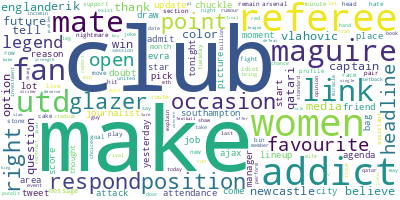

In [99]:
from wordcloud import WordCloud

# join the words of the different tweets together into one string
long_string = ' '.join(unique_tweets)
new_long_string = ' '.join(set(long_string.split(" ")))

# create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(new_long_string)

# visualize the word cloud
wordcloud.to_image()

# Topic Modelling

In [13]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Do you want to modify this by adding more stop words?
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) 
    if word not in stop_words] for doc in texts]


data = tweets_df.text_processed.values.tolist()

data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

# create a dictionary
id2word = corpora.Dictionary(data_words)

# create a corpus
texts = data_words

# convert the corpus into a BoW representation
corpus = [id2word.doc2bow(text) for text in texts]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
from pprint import pprint

# set number of topics
num_topics = 5

# build an LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# print keywords in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.040*"glazersout" + 0.032*"qatarin" + 0.019*"glazersoutnow" + 0.018*"co" + '
  '0.015*"https" + 0.014*"mufc" + 0.012*"glazers" + 0.010*"qatar" + '
  '0.009*"get" + 0.008*"back"'),
 (1,
  '0.021*"co" + 0.021*"https" + 0.020*"glazersoutnow" + 0.017*"qatarin" + '
  '0.017*"glazersout" + 0.015*"manutd" + 0.013*"united" + 0.013*"mufc" + '
  '0.010*"club" + 0.009*"qatar"'),
 (2,
  '0.031*"glazersoutnow" + 0.029*"glazersout" + 0.024*"qatarin" + '
  '0.019*"glazers" + 0.018*"https" + 0.017*"co" + 0.014*"mufc" + 0.012*"want" '
  '+ 0.008*"manutd" + 0.008*"qatar"'),
 (3,
  '0.039*"https" + 0.038*"co" + 0.030*"glazersout" + 0.027*"glazersoutnow" + '
  '0.018*"qatarin" + 0.014*"mufc" + 0.014*"sale" + 0.013*"full" + '
  '0.012*"nothing" + 0.012*"glazers"'),
 (4,
  '0.014*"glazersoutnow" + 0.012*"qatarin" + 0.010*"mufc" + 0.010*"qatar" + '
  '0.010*"co" + 0.009*"glazersout" + 0.009*"https" + 0.008*"club" + '
  '0.008*"glazers" + 0.008*"fans"')]


In [15]:
# visualise the topics
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.4 MB/s eta 0:00:00


In [16]:
import os
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.018684 -0.035916       1        1  27.933666
3      0.066797  0.007201       2        1  22.094995
2      0.018599  0.045951       3        1  21.033696
1     -0.035797 -0.056686       4        1  18.340312
4     -0.068282  0.039450       5        1  10.597331, topic_info=            Term        Freq       Total Category  logprob  loglift
1756  acceptable   89.000000   89.000000  Default  30.0000  30.0000
464      nothing  102.000000  102.000000  Default  29.0000  29.0000
16         https  440.000000  440.000000  Default  28.0000  28.0000
696         sale  120.000000  120.000000  Default  27.0000  27.0000
65          full  115.000000  115.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
40          team    6.016989   44.624982   Topic5  -5.8905   0.2409
152         take    5.488711   30.654313   Topic5  -5.9824   0.5245
113           us    6.083139   71.051245   Topic5  -5.8796  -0.2133
1651         bid    5.378963   37.690116   Topic5  -6.0026   0.2977
223          let    5.254980   66.481441   Topic5  -6.0259  -0.2932

[406 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
977       1  0.891991        able
1756      1  0.177826  acceptable
1756      2  0.566821  acceptable
1756      3  0.244511  acceptable
2283      1  0.796011      access
...     ...       ...         ...
78        2  0.094203       would
78        3  0.565215       would
78        4  0.117753       would
78        5  0.070652       would
995       4  0.799289      woulda

[796 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5])

# Sentiment Analysis

This implementation is based on the lexicon- and rule-based [VADER](https://github.com/cjhutto/vaderSentiment) sentiment analysis tool.

In [17]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 6.0 MB/s eta 0:00:00


In [100]:
'''from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for tweet_text in unique_tweets:
    vs = analyzer.polarity_scores(tweet_text)
    print(tweet_text + '\t' + str(vs))'''

"from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer\n\nanalyzer = SentimentIntensityAnalyzer()\n\nfor tweet_text in unique_tweets:\n    vs = analyzer.polarity_scores(tweet_text)\n    print(tweet_text + '\t' + str(vs))"

# Sample code
ref: https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d


# [Outdated] Trial 1 (NaN output)

In [19]:
'''for i in range(len(unique_tweets)):
    score = analyzer.polarity_scores(unique_tweets[i])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
      unique_tweets_df.loc[i, 'sentiment'] = "negative"
    elif pos > neg:
      unique_tweets_df.loc[i, 'sentiment'] = "positive"
    else:
      unique_tweets_df.loc[i, 'sentiment'] = "neutral"
    unique_tweets_df.loc[i, 'neg'] = neg
    unique_tweets_df.loc[i, 'neu'] = neu
    unique_tweets_df.loc[i, 'pos'] = pos
    unique_tweets_df.loc[i, 'compound'] = comp

unique_tweets_df.head(10)
      
def count_values_in_column(data, feature):
  total = data.loc[:, feature].value_counts(dropna=False)
  percentage=round(data.loc[:, feature].value_counts(dropna=False, normalize=True)*100, 2)

  return pd.concat([total, percentage], axis=1, keys=['Toal', 'Percentage'])

# Count values for sentiment
count_values_in_column(unique_tweets_df, "sentiment")


import matplotlib.pyplot as plt

# create data for Pie Chart
pichart = count_values_in_column(unique_tweets_df, "sentiment")
names = pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color = 'white')
plt.pie(size, labels=names, colors=['red', 'blue', 'green'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()'''

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-19-caed711aea84>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,date,user,location,text,text_processed,sentiment,neg,neu,pos,compound
0,2023-03-06 11:49:43+00:00,shAdes_VK,"Abuja, Nigeria",@privilege_mufc That's Y we need #QatarIn asa...,@privilege_mufc that's y we need #qatarin asa...,negative,0.365,0.635,0.000,-0.3182
1,2023-03-06 11:49:04+00:00,GGMANUTD23,Da qualche parte,Good Morning Reds ♥️\n\n#mufc #GlazersOut #Qat...,good morning reds ♥️#mufc #glazersout #qatarin...,negative,0.164,0.836,0.000,-0.2411
2,2023-03-06 11:47:11+00:00,patrickmcdona10,Scotland,@iqqumufc This.\nThe Glazers have emptied the ...,@iqqumufc this the glazers have emptied the cl...,negative,0.437,0.563,0.000,-0.7351
3,2023-03-06 11:46:39+00:00,biakmuan,NaN,@amysmalls_ You did it right...\nwe should do ...,@amysmalls_ you did it right we should do th...,positive,0.067,0.810,0.123,0.4203
4,2023-03-06 11:35:57+00:00,Glazersmustsell,NaN,@Glazerspissoff Shaw has been immense this sea...,@glazerspissoff shaw has been immense this sea...,positive,0.113,0.745,0.142,-0.0516
5,2023-03-06 11:32:08+00:00,StrettyDave,Down South,That result yesterday is on the Glazers head. ...,that result yesterday is on the glazers head ...,negative,0.212,0.788,0.000,-0.3612
6,2023-03-06 11:30:45+00:00,fdp1972,NaN,"Win, Lose or Draw we continue the fight agains...",win lose or draw we continue the fight agains...,negative,0.164,0.836,0.000,-0.2411
7,2023-03-06 11:30:19+00:00,shafzalimul,NaN,Even if we suffer one more 6-0 or 7-0 or an em...,even if we suffer one more 6-0 or 7-0 or an em...,negative,0.141,0.859,0.000,-0.2411
8,2023-03-06 11:26:31+00:00,Lowerbi_DLS,NaN,You have been very consistent with #GlazersOut...,you have been very consistent with #glazersout...,neutral,0.000,1.000,0.000,0.0000
9,2023-03-06 11:26:23+00:00,dr_sharvx,India,@UTDTrey Give us Manchester City's squad depth...,@utdtrey give us manchester city's squad depth...,negative,0.164,0.836,0.000,-0.2411


In [39]:
'''unique_tweets_df.loc[unique_tweets_df['sentiment'].isna()]'''

,date,user,location,text,text_processed,sentiment,neg,neu,pos,compound
1482,2023-03-02 08:55:04+00:00,LBubzz,NaN,@ManUtd #GlazersOutNOW #GlazersSellManUtd GE...,@manutd #glazersoutnow #glazerssellmanutd ge...,NaN,NaN,NaN,NaN,NaN
1483,2023-03-02 08:52:19+00:00,LUHGSzns_,NaN,@centredevils Mentality Monsters 👌 #QatarIn 🇶🇦,@centredevils mentality monsters 👌 #qatarin 🇶🇦,NaN,NaN,NaN,NaN,NaN
1484,2023-03-02 08:33:46+00:00,Lotikow8x,Kenya,"ETH, has set the mood, standards of the origin...",eth has set the mood standards of the origin...,NaN,NaN,NaN,NaN,NaN
1485,2023-03-02 08:19:19+00:00,manutdTOPFAN73,"Wales, United Kingdom",As a @ManUtd fan who has always been commentin...,as a @manutd fan who has always been commentin...,NaN,NaN,NaN,NaN,NaN
1486,2023-03-02 08:08:12+00:00,blackeyedchip,"Manchester, England",A tweet a day until our football club is no lo...,a tweet a day until our football club is no lo...,NaN,NaN,NaN,NaN,NaN
1487,2023-03-02 07:43:46+00:00,marcusbailey007,"Lincolnshire, United Kingdom",Another day another #GlazersOut #GlazersOnlyFu...,another day another #glazersout #glazersonlyfu...,NaN,NaN,NaN,NaN,NaN
1488,2023-03-02 07:37:24+00:00,LouisejayneWal1,"Sale, England","Good morning, lovely people. Happy Thursday. J...",good morning lovely people happy thursday j...,NaN,NaN,NaN,NaN,NaN
1489,2023-03-02 07:36:18+00:00,Jim_mufc_,NaN,"It's Thursday, the working week end is in sigh...",it's thursday the working week end is in sigh...,NaN,NaN,NaN,NaN,NaN
1490,2023-03-02 07:35:02+00:00,broomhandle1,"Worcester, England","Hate Parasites, Love Manchester United Footbal...",hate parasites love manchester united footbal...,NaN,NaN,NaN,NaN,NaN
1491,2023-03-02 07:33:54+00:00,PogbaLove2Dance,"England, United Kingdom",New day and nothing changes! #GlazersOut #ManU...,new day and nothing changes #glazersout #manu...,NaN,NaN,NaN,NaN,NaN


# Trial 2 (Solved NaN output issue)

In [101]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for i in unique_tweets_df.index:
    tweet_text = unique_tweets_df.loc[i, 'text_processed']
    score = analyzer.polarity_scores(tweet_text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
      unique_tweets_df.loc[i, 'vader_sentiment'] = "negative"
    elif pos > neg:
      unique_tweets_df.loc[i, 'vader_sentiment'] = "positive"
    else:
      unique_tweets_df.loc[i, 'vader_sentiment'] = "neutral"
    unique_tweets_df.loc[i, 'vader_neg'] = neg
    unique_tweets_df.loc[i, 'vader_neu'] = neu
    unique_tweets_df.loc[i, 'vader_pos'] = pos
    unique_tweets_df.loc[i, 'vader_compound'] = comp

unique_tweets_df.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,date,user,location,text,text_processed,vader_sentiment,vader_neg,vader_neu,vader_pos,vader_compound
0,2023-03-07 13:23:13+00:00,_NextGenBaller,NaN,@ChrisWheelerDM @MailSport It’s clear fatigue ...,chriswheelerdm mailsport its clear fatigue pla...,positive,0.116,0.632,0.253,0.5994
1,2023-03-07 13:23:12+00:00,YALOOHD,NaN,When is the Contract getting terminated @ManUt...,when is the contract getting terminated manutd...,positive,0.000,0.873,0.127,0.2584
2,2023-03-07 13:23:05+00:00,UtdXclusive,"Manchester, England",‼️ - The two days of training for #mufc leadin...,the two days of training for mufc leading up ...,neutral,0.000,1.000,0.000,0.0000
3,2023-03-07 13:22:52+00:00,footballleaguez,"London, England",#LIVMUN Liverpool Manchester United Man United...,livmun liverpool manchester united man united ...,positive,0.000,0.641,0.359,0.6808
4,2023-03-07 13:22:33+00:00,RokaniMediaFB,"Kampala ,Uganda",🚨 The two days of training for Manchester Unit...,the two days of training for manchester unite...,positive,0.000,0.872,0.128,0.4215
5,2023-03-07 13:22:18+00:00,UtdXclusive,"Manchester, England",📝 - Ten Hag will not allow the tired #mufc nar...,ten hag will not allow the tired mufc narrati...,positive,0.044,0.819,0.137,0.5484
6,2023-03-07 13:22:17+00:00,RokaniMediaFB,"Kampala ,Uganda",🚨🇳🇱 Ten Hag’s message to the United players af...,ten hags message to the united players after ...,positive,0.050,0.763,0.186,0.7391
7,2023-03-07 13:22:05+00:00,_Castael,NaN,"Add AWB, Bailly, Tuanzebe, Alex Telles, McTomi...",add awb bailly tuanzebe alex telles mctominay ...,neutral,0.000,1.000,0.000,0.0000
8,2023-03-07 13:21:56+00:00,ManUtdMania_,"Manchester, England",Well done again Mark. 👏🏼 UTFR!! 🔥 #MUFC ✅ http...,well done again mark utfr mufc i0xz8wr65w,positive,0.000,0.741,0.259,0.2732
9,2023-03-07 13:21:54+00:00,RooKnee56,NaN,Ten Hag ready to make top transfer target’s “d...,ten hag ready to make top transfer targets dre...,positive,0.000,0.569,0.431,0.7964


In [87]:
def count_values_in_column(data, feature):
  total = data.loc[:, feature].value_counts(dropna=False)
  percentage=round(data.loc[:, feature].value_counts(dropna=False, normalize=True)*100, 2)

  return pd.concat([total, percentage], axis=1, keys=['Toal', 'Percentage'])

# Count values for sentiment
count_values_in_column(unique_tweets_df, "sentiment")

,Toal,Percentage
positive,787,55.70
negative,326,23.07
neutral,300,21.23


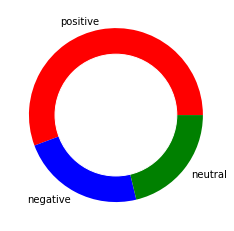

In [88]:
import matplotlib.pyplot as plt

# create data for Pie Chart
pichart = count_values_in_column(unique_tweets_df, "sentiment")
names = pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color = 'white')
plt.pie(size, labels=names, colors=['red', 'blue', 'green'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Appendix: Comparison between VADER & TextBlob

In [92]:
from textblob import TextBlob

res = TextBlob(unique_tweets_df.loc[0, 'text_processed'])
print(res.sentiment.polarity)

0.13


In [95]:
for i in unique_tweets_df.index:
  tweet_text = unique_tweets_df.loc[i, 'text_processed']
  res = TextBlob(tweet_text).sentiment
  print(tweet_text + '\t' + str(res))

chriswheelerdm mailsport its clear fatigue played a part in that embarrassing display but utd still have opportunity to end season on high mufc	Sentiment(polarity=0.13, subjectivity=0.4616666666666666)
when is the contract getting terminated manutd we cannot resign this weghorst guy mufc wxp2hs0vq3	Sentiment(polarity=0.0, subjectivity=0.0)
 the two days of training for mufc leading up to liverpool are said to have been belowpar chriswheelerdm	Sentiment(polarity=0.0, subjectivity=0.0)
livmun liverpool manchester united man united premierleague mufc fpl rcbvdc football 7vbetz975b	Sentiment(polarity=0.0, subjectivity=0.0)
 the two days of training for manchester united leading up to liverpool are said to have been belowpar chriswheelerdm mufc 	Sentiment(polarity=0.0, subjectivity=0.0)
 ten hag will not allow the tired mufc narrative to take hold in the two training sessions following the late exacting victory over west ham manchester united had lacked zip which was concerning melissareddy

In [102]:
for i in unique_tweets_df.index:
  tweet_text = unique_tweets_df.loc[i, 'text_processed']
  res = TextBlob(tweet_text).sentiment
  polarity = res.polarity
  if polarity < 0:
    unique_tweets_df.loc[i, 'blob_sentiment'] = "negative"
  elif polarity > 0:
    unique_tweets_df.loc[i, 'blob_sentiment'] = "positive"
  else:
    unique_tweets_df.loc[i, 'blob_sentiment'] = "neutral"
  unique_tweets_df.loc[i, 'blob_polarity'] = polarity

  subjectivity = res.subjectivity
  unique_tweets_df.loc[i, 'blob_subjectivity'] = subjectivity

unique_tweets_df.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,date,user,location,text,text_processed,vader_sentiment,vader_neg,vader_neu,vader_pos,vader_compound,blob_sentiment,blob_polarity,blob_subjectivity
0,2023-03-07 13:23:13+00:00,_NextGenBaller,NaN,@ChrisWheelerDM @MailSport It’s clear fatigue ...,chriswheelerdm mailsport its clear fatigue pla...,positive,0.116,0.632,0.253,0.5994,positive,0.130000,0.461667
1,2023-03-07 13:23:12+00:00,YALOOHD,NaN,When is the Contract getting terminated @ManUt...,when is the contract getting terminated manutd...,positive,0.000,0.873,0.127,0.2584,neutral,0.000000,0.000000
2,2023-03-07 13:23:05+00:00,UtdXclusive,"Manchester, England",‼️ - The two days of training for #mufc leadin...,the two days of training for mufc leading up ...,neutral,0.000,1.000,0.000,0.0000,neutral,0.000000,0.000000
3,2023-03-07 13:22:52+00:00,footballleaguez,"London, England",#LIVMUN Liverpool Manchester United Man United...,livmun liverpool manchester united man united ...,positive,0.000,0.641,0.359,0.6808,neutral,0.000000,0.000000
4,2023-03-07 13:22:33+00:00,RokaniMediaFB,"Kampala ,Uganda",🚨 The two days of training for Manchester Unit...,the two days of training for manchester unite...,positive,0.000,0.872,0.128,0.4215,neutral,0.000000,0.000000
5,2023-03-07 13:22:18+00:00,UtdXclusive,"Manchester, England",📝 - Ten Hag will not allow the tired #mufc nar...,ten hag will not allow the tired mufc narrati...,positive,0.044,0.819,0.137,0.5484,negative,-0.175000,0.350000
6,2023-03-07 13:22:17+00:00,RokaniMediaFB,"Kampala ,Uganda",🚨🇳🇱 Ten Hag’s message to the United players af...,ten hags message to the united players after ...,positive,0.050,0.763,0.186,0.7391,positive,0.196429,0.283929
7,2023-03-07 13:22:05+00:00,_Castael,NaN,"Add AWB, Bailly, Tuanzebe, Alex Telles, McTomi...",add awb bailly tuanzebe alex telles mctominay ...,neutral,0.000,1.000,0.000,0.0000,neutral,0.000000,0.000000
8,2023-03-07 13:21:56+00:00,ManUtdMania_,"Manchester, England",Well done again Mark. 👏🏼 UTFR!! 🔥 #MUFC ✅ http...,well done again mark utfr mufc i0xz8wr65w,positive,0.000,0.741,0.259,0.2732,neutral,0.000000,0.000000
9,2023-03-07 13:21:54+00:00,RooKnee56,NaN,Ten Hag ready to make top transfer target’s “d...,ten hag ready to make top transfer targets dre...,positive,0.000,0.569,0.431,0.7964,positive,0.262500,0.412500
